In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Spotify Song Attributes EDA
- import data
- EDA to visualize data and observe structure
- train a classifier (decision tree)
- predict target using the classifier

In [2]:
data = pd.read_csv('./data.csv').drop(columns=['Unnamed: 0'])

In [3]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [6]:
train, test = train_test_split(data, test_size=.15)

In [7]:
print("Training size: ", len(train), "| Testing size: ", len(test))

Training size:  1714 | Testing size:  303


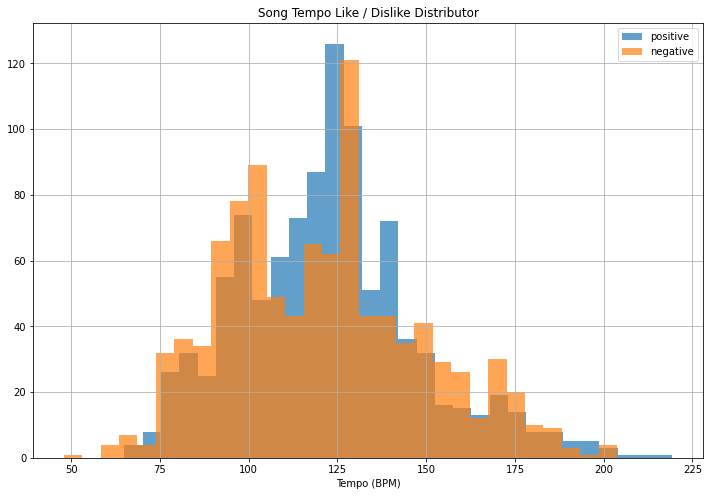

In [8]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

fig = plt.figure(figsize=(12, 8))
plt.title('Song Tempo Like / Dislike Distributor')
pos_tempo.hist(alpha = 0.7, bins=30, label='positive')
neg_tempo.hist(alpha = 0.7, bins=30, label='negative')
plt.xlabel('Tempo (BPM)')
plt.legend(loc="upper right");

### Let's do this for all of the features

In [9]:
def plot_features(feature, fig, subplot_position):
    
    pos = data[data['target'] == 1][feature]
    neg = data[data['target'] == 0][feature]
    
    # Create a subplot for both 
    ax = fig.add_subplot(4, 3, int(subplot_position))
    ax.set_xlabel(str(feature))
    ax.set_ylabel('Count')
    ax.set_title(f'Song {str(feature)} Like Distribution')
    pos.hist(alpha=0.5, bins=30)
    ax2 = fig.add_subplot(4, 3, int(subplot_position))
    neg.hist(alpha=0.5, bins=30);

In [10]:
# The subplots should have different names, which raises an error. 
# But that's going to be depreciated in a latter version of matplotlib
# so I decided to just suppress the warning for now.

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

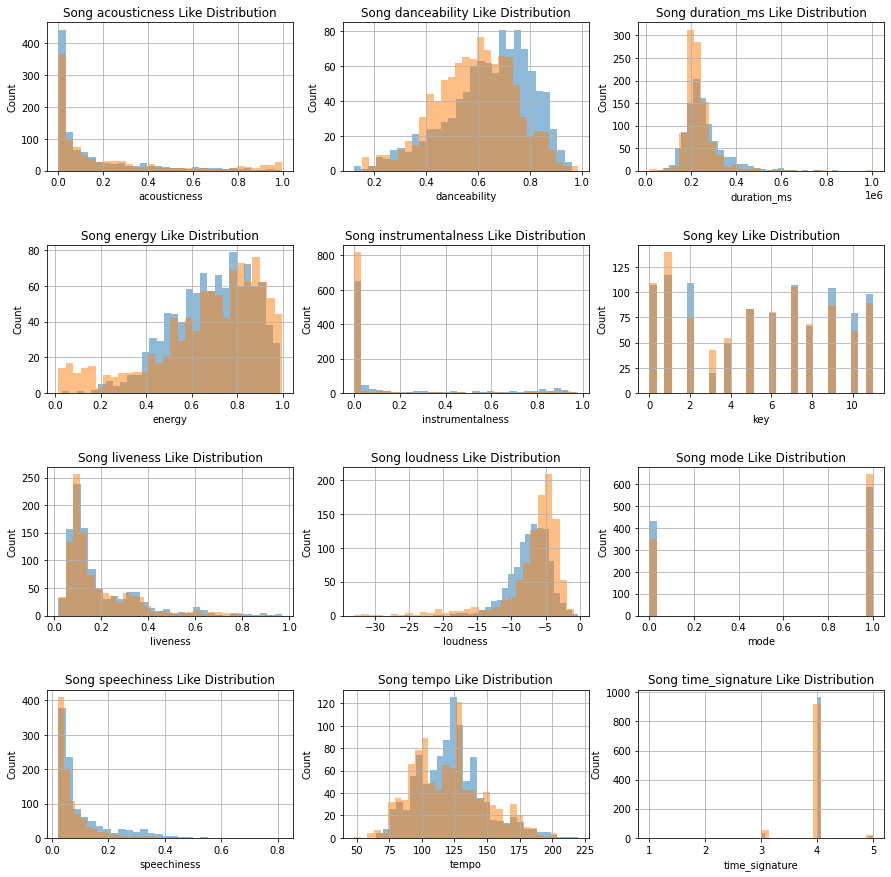

In [12]:
# Looping through all of the features other than the target with an integer for a datatype
# (So all of the features other than target, song_title, and artist)

fig2 = plt.figure(figsize=(15, 15))
fig2.subplots_adjust(hspace=.5)

for nums, i in enumerate(data.columns[:-4]):
    
    nums += 1

    plot_features(i, fig2, nums)